In [4]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [16]:
def fft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]#pega o tamanho do vetor x

    next_pow_of_2 = int(2 ** np.ceil(np.log2(N)))
    x = np.pad(x, (0, next_pow_of_2 - N), 'constant')
    N = x.shape[0]#pega o tamanho do vetor depois de deixar em potencia de 2
    if N <= 2:
        return dft(x)# se for um tamanho menor ou igual a 2 é mais eficiente fazer a DFT direto
    else:# para outros casos se divide a fft em 2 e faz o recursivo do sistema
        X_even = fft(x[::2])#parte par
        X_odd = fft(x[1::2])#parte impar
        terms = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + terms[:int(N/2)] * X_odd,
                               X_even + terms[int(N/2):] * X_odd])

In [17]:
%timeit dft(x)
%timeit fft(x)
%timeit np.fft.fft(x)

119 ms ± 23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
48.2 ms ± 6.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
19.9 µs ± 3.53 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


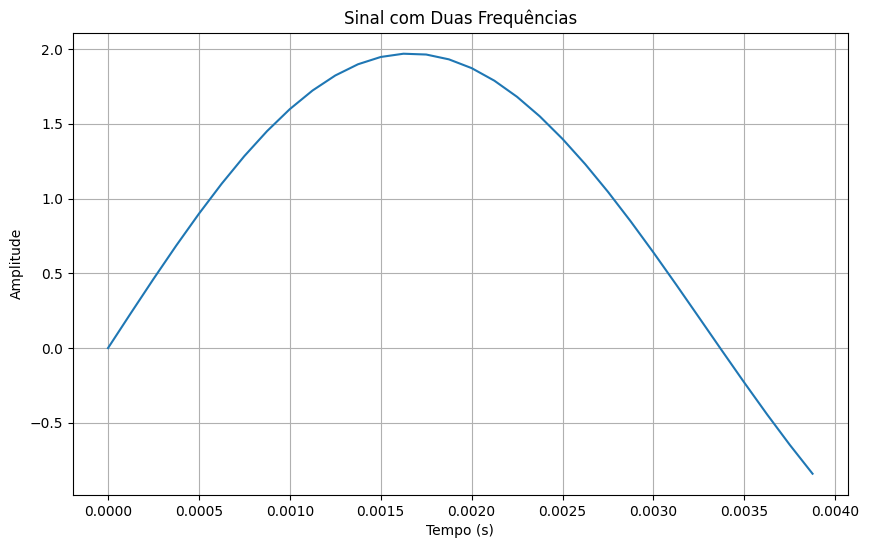

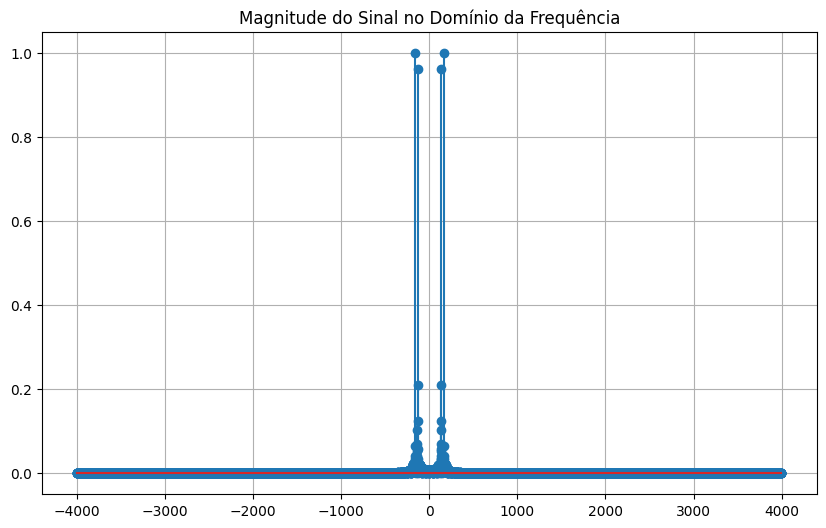

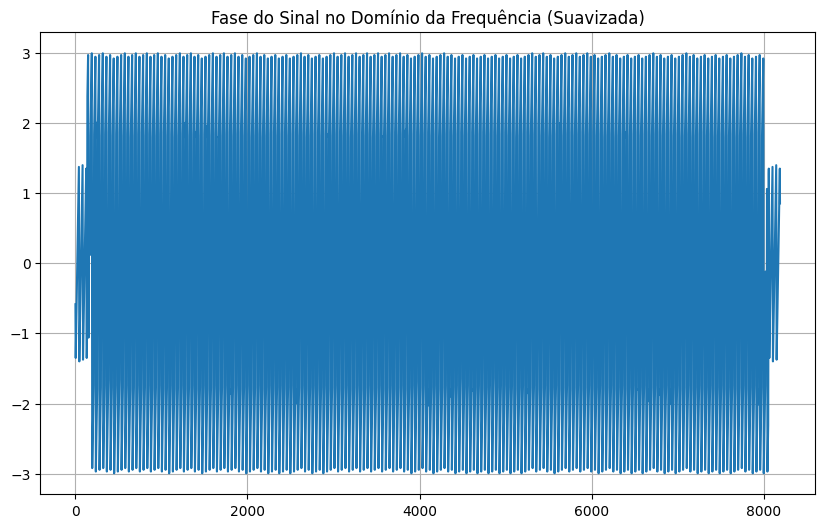

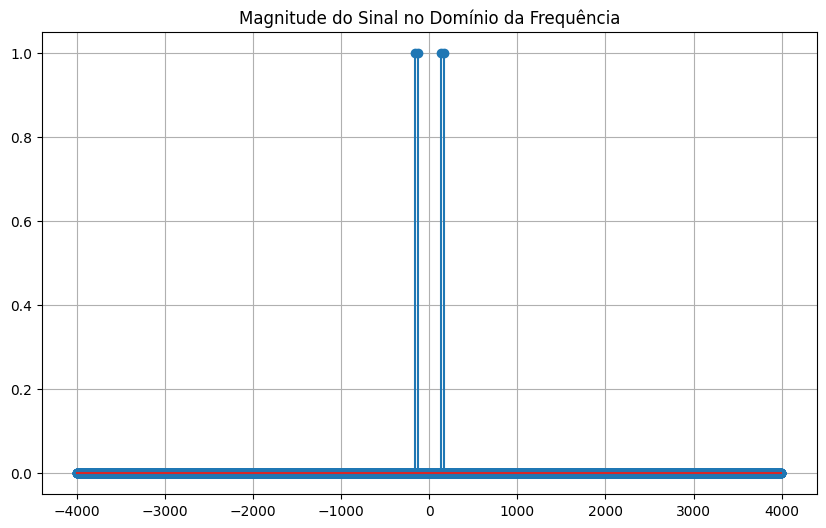

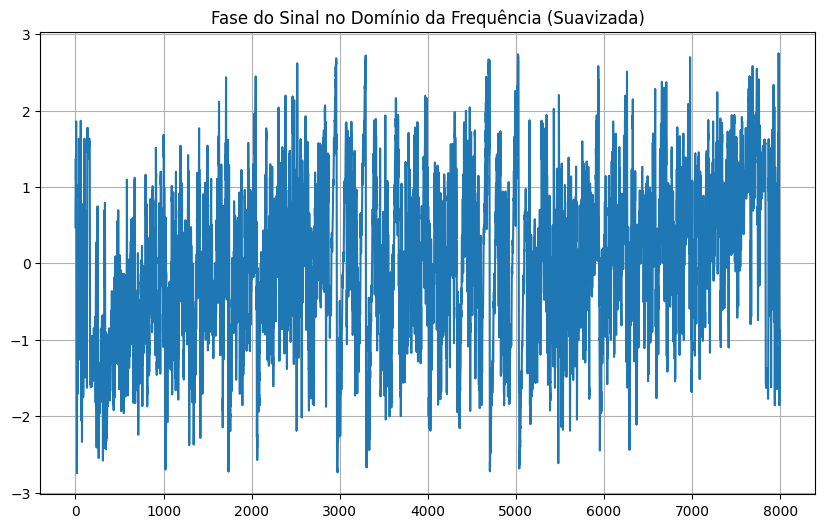

In [20]:
#Cooley–Tukey FFT
#Daniel Pires 05/10/23
import numpy as np
import matplotlib.pyplot as plt

#parametriza
frequencia1 = 132  # Dó
frequencia2 = 165  # Mi
amplitude1 = 1.0  # Amplitude da primeira senoide
amplitude2 = 1.0  # Amplitude da segunda senoide
duracao = 1.0  # Duração do sinal (em segundos)
taxa_amostragem = 8000  # Taxa de amostragem (em Hz)

# Crie um vetor de tempo de 0 a duracao com passos de 1/taxa_amostragem
tempo = np.arange(0, duracao, 1.0 / taxa_amostragem)

# Gere as senoides com as frequências e amplitudes especificadas
sinal1 = amplitude1 * np.sin(2 * np.pi * frequencia1 * tempo)
sinal2 = amplitude2 * np.sin(2 * np.pi * frequencia2 * tempo)

# Some as senoides para criar o sinal final
sinal_final = sinal1 + sinal2

# Plote o sinal original
plt.figure(figsize=(10, 6))
plt.plot(tempo[:int(taxa_amostragem*0.004)], sinal_final[:int(taxa_amostragem*0.004)])
plt.title('Sinal com Duas Frequências')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

X = fft(sinal_final)
freq_X = np.fft.fftfreq(len(X), 1/taxa_amostragem)
escala = 1/4000;
plt.figure(figsize=(10, 6))
plt.title('Magnitude do Sinal no Domínio da Frequência')
plt.stem(freq_X, escala*np.abs(X))
plt.grid(True)

fase = np.angle(X)

#Parâmetro de janela da média móvel
janela = 5
fase_suavizada = np.convolve(fase, np.ones(janela)/janela, mode='same')

#gráfico suavizado
plt.figure(figsize=(10, 6))
plt.title('Fase do Sinal no Domínio da Frequência (Suavizada)')
plt.plot(fase_suavizada)
plt.grid(True)
plt.show()


X= np.fft.fft(sinal_final)

freq_X = np.fft.fftfreq(len(X), 1/taxa_amostragem)
escala = 1/4000;
plt.figure(figsize=(10, 6))
plt.title('Magnitude do Sinal no Domínio da Frequência')
plt.stem(freq_X, escala*np.abs(X))
plt.grid(True)

fase = np.angle(X)

#Parâmetro de janela da média móvel
janela = 5
fase_suavizada = np.convolve(fase, np.ones(janela)/janela, mode='same')

#gráfico suavizado
plt.figure(figsize=(10, 6))
plt.title('Fase do Sinal no Domínio da Frequência (Suavizada)')
plt.plot(fase_suavizada)
plt.grid(True)
plt.show()